# Basic statistics

## Word Frequency


### Load data

In [27]:
all_dialects = set()

for _, sentences in corpus.items():
    for sentence in sentences:
        all_dialects.add(sentence["metadata"]["dialect"])

print(all_dialects)


{'沙流・千歳', '沙流地方など', '多くの地方', '千歳地方など', '東・北', '小田洲', '虻田', '沙流・千歳・鵡川以外', '静内（東別）', '静内', '沙流・千歳・鵡川', None, '樺太（小田洲）', '石狩（旭川）', '鵡川', '美幌', '来知志', '旭川・旭川など', '日高東部・十勝', '旭川', '釧路', '十勝', '白糠', '釧路（鶴居）', '阿寒', '十勝以外', '千歳', '白老', '十勝・本別', '樺太（西海岸中部）', '旭川・釧路', '幌別', '石狩川', '西', '石狩', '沙流・千歳・鵡川・静内など', '鵜城', '静内地方など', '旭川以外', '浦河', '沙流', '鵡川・沙流川上流など', '樺太', '静内・三石', '浦河より東の日高地方', '十勝地方など', '様似'}


In [29]:
SAKAHALIN_DIALECTS = [
    "小田洲",
    "樺太（小田洲）",
    "来知志",
    "樺太（西海岸中部）",
    "鵜城",
    "樺太",
]

In [60]:
import pickle
import json

from utils.corpus import CorpusItem
from utils.tokenize import is_word
from utils.lemmatize import normalize

from tqdm.notebook import tqdm

with open("output/annotated_translated_tokenized_corpus_by_book.pkl", "rb") as file:
    corpus: dict[str, list[CorpusItem]] = pickle.load(file)

# SAKHALIN_BOOKS = {
#     "からふとのアイヌご（入門）",
#     "カラフトのアイヌ語（中級）",
#     "カラフトのアイヌ語（初級）",
#     "ニューエクスプレス・スペシャル 日本語の隣人たち I+II",
#     "ピウスツキ記念碑",
#     "千徳太郎治のピウスツキ宛書簡",
#     "浅井タケ昔話全集I,II",
# }

MODERN_WORDS = {"アイヌタイムズ", "プラハ宣言", "ウポポイ館内展示", "萱野茂の国会演説"}


combined_words = []
combined_words_hokkaido_traditional = []
combined_words_sakhalin = []
tokens_types_data_by_book = {}

for book, sentences in tqdm(corpus.items(), total=len(corpus), desc="Processing books"):
    book_words = []
    
    for sentence in sentences:
        for word in sentence["words"]:
            normalized = normalize(word)
            if is_word(normalized) and (len(word) != 1 or word in ["p", "a", "i", "e", "u", "o"]):
                combined_words.append(normalized)
                
                if (sentence["metadata"]["dialect"] not in SAKAHALIN_DIALECTS 
                    and book not in MODERN_WORDS):
                    combined_words_hokkaido_traditional.append(normalized)
                    
                if sentence["metadata"]["dialect"] in SAKAHALIN_DIALECTS:
                    combined_words_sakhalin.append(normalized)
                    
            book_words.append(word)
            
    tokens = len(book_words)
    types = len(set(book_words))
    tokens_types_data_by_book[book] = {
        "tokens": tokens,
        "types": types,
    }
    print(f"{book}\t{tokens} ({types})")

total_tokens = len(combined_words)
total_types = len(set(combined_words))

print(f"Total: {total_tokens} ({total_types})")
print()
print(
    f"Hokkaido traditional words: {len(combined_words_hokkaido_traditional)} ({len(set(combined_words_hokkaido_traditional))})"
)
print()
print(
    f"Sakhalin words: {len(combined_words_sakhalin)} ({len(set(combined_words_sakhalin))})"
)
print()

with open(f"output/terms_tokens.json", "w") as f:
    json.dump({
        "total": {
            "tokens": total_tokens,
            "types": total_types,
        },
        "by_book": tokens_types_data_by_book,
    }, f, ensure_ascii=False, indent=4)

Processing books:   0%|          | 0/53 [00:00<?, ?it/s]

アイヌ語アーカイブ	524976 (12693)
アイヌ語アーカイブ音声資料	31729 (2976)
アイヌ民族文化センター研究紀要	16920 (1585)
アイヌ神謡集	9550 (1470)
アイヌ語鵡川方言日本語‐アイヌ語辞典	63742 (5910)
平取町アイヌ口承文芸	132733 (7134)
アイヌタイムズ	142153 (10844)
AA研アイヌ語資料	102585 (5960)
アイヌ語口承文芸コーパス	72387 (3279)
アイヌ語會話字典	13710 (2201)
鍋沢元蔵筆録ノート	15200 (2213)
しずないのアイヌご（入門）	299 (137)
カムイユカㇻを聞いてアイヌ語を学ぶ	3036 (714)
浅井タケ昔話全集I,II	75298 (4502)
北海道立アイヌ民族文化研究センター紀要	2103 (765)
アイヌ語・アイヌ文化研究の課題	1603 (606)
幌別のアイヌ語（中級）	1508 (468)
アイヌ語音声資料	1399 (550)
千歳のアイヌ語（中級）	1483 (448)
千徳太郎治のピウスツキ宛書簡	2069 (559)
からふとのアイヌご（入門）	298 (145)
石狩川のアイヌ語（中級）	1374 (465)
十勝のアイヌ語（中級）	1422 (388)
沙流のアイヌ語（中級）	1420 (458)
アイヌ口承文芸テキスト集	8605 (940)
美幌のアイヌ語（中級）	1376 (378)
いしかりがわのアイヌご（入門）	312 (151)
千歳のアイヌ語（初級）	1938 (411)
幌別のアイヌ語（初級）	1910 (398)
十勝のアイヌ語（初級）	735 (252)
ニューエクスプレスプラス アイヌ語	4407 (775)
アイヌ語ラジオ講座テキスト	12181 (1646)
白沢ナベと小田イトの会話	77 (43)
びほろのあいぬご（入門）	512 (185)
カラフトのアイヌ語（初級）	826 (330)
アイヌ語復興に関わる諸問題	286 (164)
とかちのアイヌご（入門）	348 (146)
第27回アイヌ語弁論大会	1555 (343)
アコㇿイタㇰ	1999 (331)
美幌のアイヌ語（初級）	1991 (379)
プラハ宣言	969 (175)
さるのアイヌご（入

### Bar chart


In [89]:
from collections import Counter

combined_words_counter = Counter(combined_words)
print(combined_words_counter.most_common(10))

combined_words_hokkaido_traditional_counter = Counter(
    combined_words_hokkaido_traditional
)
print(combined_words_hokkaido_traditional_counter.most_common(10))

combined_words_sakhalin_counter = Counter(combined_words_sakhalin)
print(combined_words_sakhalin_counter.most_common(10))

combined_words_hokkaido_modern_counter = Counter()
for word in combined_words_counter:
    combined_words_hokkaido_modern_counter[word] = combined_words_counter[word] - combined_words_hokkaido_traditional_counter[word] - combined_words_sakhalin_counter[word]

print(combined_words_hokkaido_modern_counter.most_common(10))

[('a=', 55394), ('ne', 46398), ('wa', 42887), ('=an', 32546), ('kor', 28123), ('an', 27720), ('ka', 21703), ('ta', 19803), ('hine', 14195), ('ki', 13220)]
[('a=', 51448), ('ne', 39190), ('wa', 38251), ('=an', 31926), ('kor', 26600), ('an', 24072), ('ka', 18807), ('ta', 15612), ('hine', 14009), ('e=', 12880)]
[('taa', 6713), ('manu', 2388), ('teh', 1355), ('kusu', 1221), ('ike', 1210), ('nah', 1093), ('tani', 1072), ('neanpe', 934), ('orowa', 902), ('horokewpo', 897)]
[('ne', 6996), ('ta', 4065), ('wa', 4048), ('a=', 3895), ('ruwe', 3069), ('an', 2842), ('ka', 2517), ('or', 2106), ('ku=', 2071), ('utar', 1505)]


In [96]:
from matplotlib.font_manager import FontProperties, fontManager, plistlib

font_path = "../fonts/NotoSansCJK-Regular.ttc"
fontManager.addfont(font_path)
plt.rcParams["font.family"] = ["Noto Sans CJK JP"]

# font_prop = FontProperties(fname=font_path)

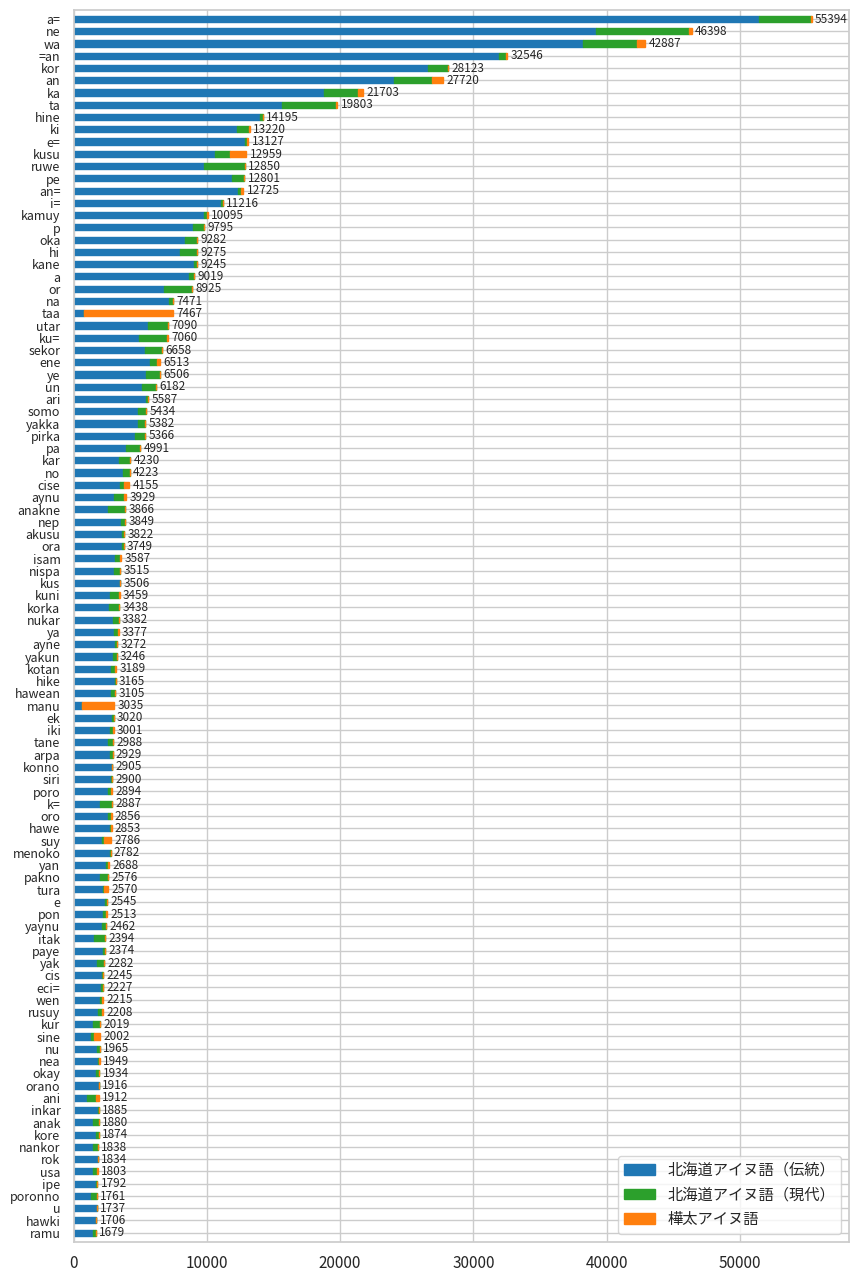

In [135]:
from matplotlib import pyplot as plt
import numpy as np

def plot_word_frequency(counter_specs: list[dict], max_words: int = 100):
    # Get the union of all words in the top max_words of each counter
    all_words = set()
    for spec in counter_specs:
        counter = spec['counter']
        all_words.update(dict(counter.most_common(max_words)).keys())

    # Sort words by total frequency across all counters
    words = sorted(all_words, 
                  key=lambda w: sum(spec['counter'][w] for spec in counter_specs),
                  reverse=True)[:100] # Take only top 100

    fig, ax = plt.subplots(figsize=(10, 16))

    width = 0.5
    bottom = np.zeros(len(words))

    for spec in counter_specs:
        counter = spec['counter']
        name = spec.get('name', '')
        color = spec.get('color', '#1f77b4')

        counts = [counter[word] for word in words]
        p = ax.barh(range(len(words)), counts, width, label=name, left=bottom, color=color, edgecolor=color)
        bottom += counts
        # ax.bar_label(p, label_type='center', fontsize=6, padding=15)

    for i, word in enumerate(words):
        total = sum(
            counter[word] for spec in counter_specs for counter in [spec["counter"]]
        )
        ax.text(
            bottom[i] + 250,  # Offset to the right of the total bar
            i,  # Vertical position aligned with the bar
            f"{int(total)}",  # Display the total
            va="center",
            ha="left",
            fontsize=8.5,
        )

    ax.set_yticks(range(len(words)))
    ax.set_yticklabels(words, fontsize=9) # Remove reversed() to show most frequent at top
    ax.invert_yaxis()
    ax.margins(y=0.005)
    ax.legend()

    plt.savefig("output/word_frequency_combined.png", dpi=350, pad_inches=0.1, bbox_inches="tight")
    plt.show()

# Create separate counters for each dialect
counter_specs = [
    {
        "name": "北海道アイヌ語（伝統）",
        "counter": combined_words_hokkaido_traditional_counter,
        "color": "#1f77b4",
    },
    {
        "name": "北海道アイヌ語（現代）",
        "counter": combined_words_hokkaido_modern_counter,
        "color": "#2ca02c",
    },
    {
        "name": "樺太アイヌ語", 
        "counter": combined_words_sakhalin_counter,
        "color": "#ff7f0e",
    },
]

plot_word_frequency(counter_specs)

### Word Cloud

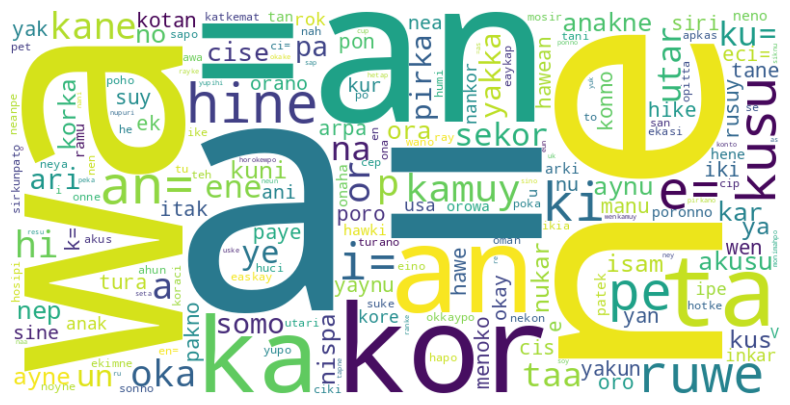

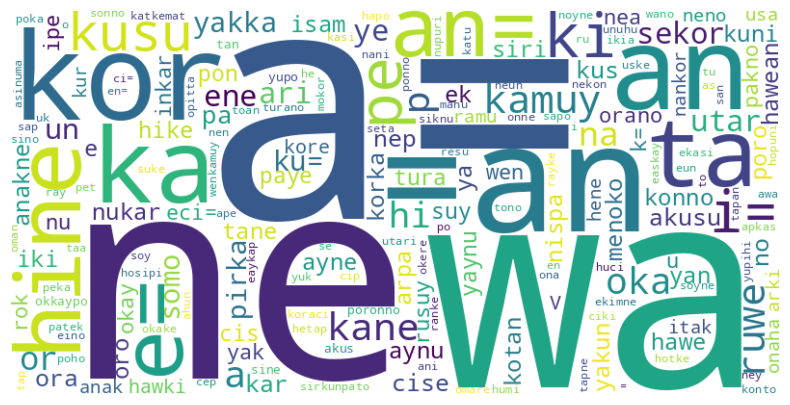

In [15]:
import wordcloud as wc

wordcloud = wc.WordCloud(
    width=800, height=400, background_color="white"
).generate_from_frequencies(combined_words_counter)
plt.figure(figsize=(18, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud_traditional = wc.WordCloud(
    width=800, height=400, background_color="white"
).generate_from_frequencies(combined_words_hokkaido_traditional_counter)
plt.figure(figsize=(18, 5))
plt.imshow(wordcloud_traditional, interpolation="bilinear")
plt.axis("off")
plt.show()


## N-Grams


In [16]:
from nltk.util import ngrams
from collections import Counter

n = 2
ngrams = ngrams(combined_words, n)
ngram_counts = Counter(ngrams)
for ngram, count in ngram_counts.most_common(100):
    print(f"{' '.join(ngram):10}\t{count:5}")

ruwe ne   	10296
a= kor    	 8805
pe ne     	 4845
oka =an   	 4826
or ta     	 4718
an pe     	 4299
ne kusu   	 3820
=an wa    	 3677
wa a=     	 3486
=an hine  	 3480
p ne      	 3299
a= ye     	 3130
ne wa     	 3104
somo ki   	 3008
ne na     	 2960
an= an    	 2897
ne yakka  	 2783
ka somo   	 2705
ka a=     	 2478
ne ya     	 2147
ene an    	 2140
ari an    	 2099
a= kar    	 2076
an hi     	 2070
taa       	 2053
a p       	 2049
=an ruwe  	 2046
=an kor   	 1998
an wa     	 1990
ne ruwe   	 1989
or un     	 1952
a= ki     	 1947
wa an     	 1931
pe a=     	 1800
ne a      	 1786
ki wa     	 1775
yaynu =an 	 1685
paye =an  	 1631
sekor hawean	 1589
ki no     	 1514
=an kane  	 1493
an ruwe   	 1436
hine a=   	 1411
kane oka  	 1409
ta a=     	 1386
kusu ne   	 1385
a= nukar  	 1362
kor wa    	 1347
nep ka    	 1343
inkar =an 	 1336
a= ne     	 1326
okay pe   	 1278
wa ne     	 1276
=an pe    	 1256
oro ta    	 1209
wa i=     	 1205
wa isam   	 1189
=an ayne  	 1171
wa an=    	 

## TF-IDF

In [17]:
# TF-IDF
from typing import cast
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse
import json

def compute_tf_idf(corpus: dict[str, list[RawSentence]]):
    documents = {
        doc_id: "∥".join(word for sentence in sentences for word in sentence["words"])
        for doc_id, sentences in corpus.items()
    }

    vectorizer = TfidfVectorizer(
        tokenizer=lambda x: x.split("∥"), preprocessor=None
    )
    tfidf_matrix = cast(sparse.csr_matrix, vectorizer.fit_transform(documents.values()))
    feature_names = vectorizer.get_feature_names_out()

    tf_idf_scores = {}
    for doc_idx, doc_id in enumerate(documents.keys()):
        # Extract the non-zero elements for the document
        row = tfidf_matrix.getrow(doc_idx)  # Ensure we work with a sparse row
        non_zero_indices = row.indices
        tf_idf_scores[doc_id] = {
            feature_names[idx]: row[0, idx] for idx in non_zero_indices
        }

    return tf_idf_scores


# Example usage
tf_idf_scores = compute_tf_idf(corpus)


with open("output/tf_idf_scores3.json", "w") as f:
    json.dump(tf_idf_scores, f, ensure_ascii=False, indent=4)

/home/mkpoli/projects/Ainu/ainu-corpora-process/.venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


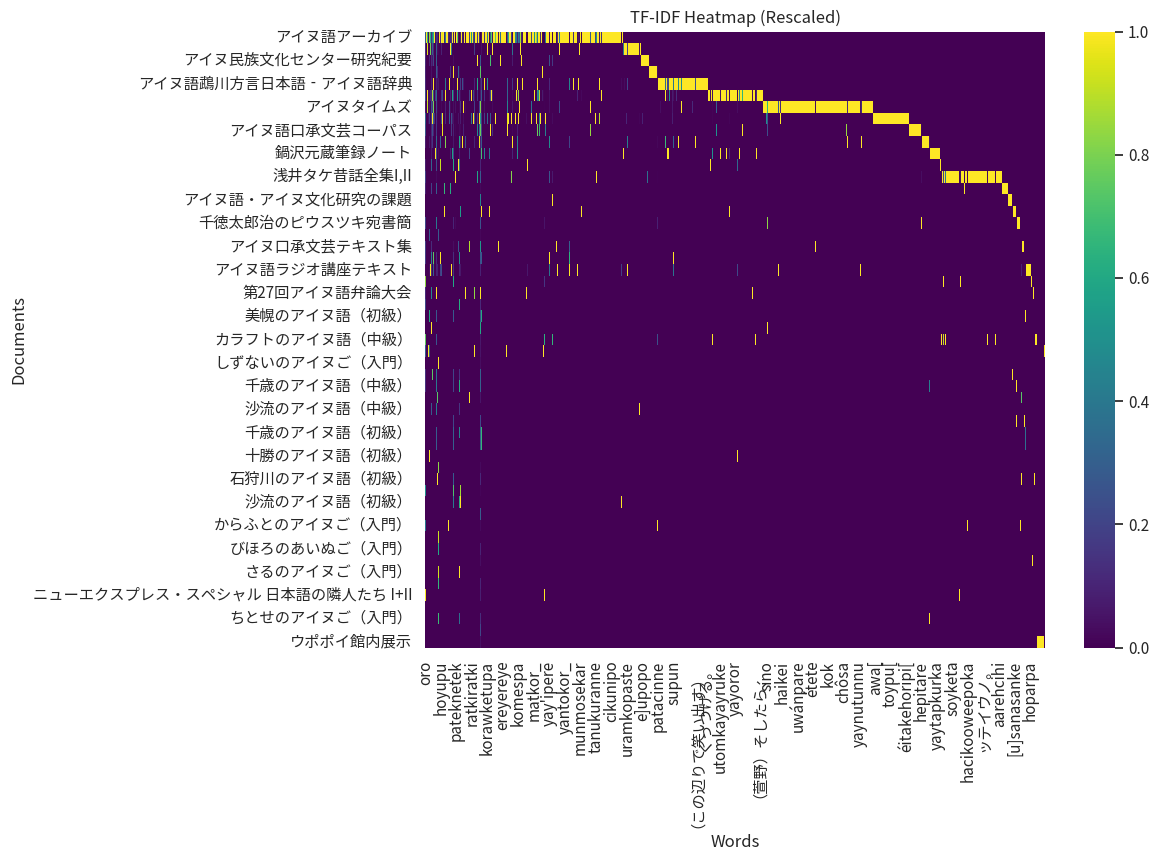

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.font_manager import FontProperties, fontManager
from sklearn.preprocessing import MinMaxScaler

font_path = "../fonts/NotoSansCJK-Regular.ttc"
fontManager.addfont(font_path)
font_prop = FontProperties(fname=font_path)

plt.rcParams["font.family"] = ["Noto Sans CJK JP"]

def visualize_tfidf_heatmap(tf_idf_scores):
    # Convert to DataFrame
    tfidf_df = pd.DataFrame.from_dict(tf_idf_scores, orient="index").fillna(0)

    # Rescale values between 0 and 1
    scaler = MinMaxScaler()
    tfidf_rescaled = pd.DataFrame(
        scaler.fit_transform(tfidf_df), index=tfidf_df.index, columns=tfidf_df.columns
    )

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(tfidf_rescaled, cmap="viridis", annot=False, cbar=True)
    plt.title("TF-IDF Heatmap (Rescaled)")
    plt.xlabel("Words")
    plt.ylabel("Documents")
    plt.show()


# Example usage
visualize_tfidf_heatmap(tf_idf_scores)

/home/mkpoli/projects/Ainu/ainu-corpora-process/.venv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/mkpoli/projects/Ainu/ainu-corpora-process/.venv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/mkpoli/projects/Ainu/ainu-corpora-process/.venv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 24029 (\N{CJK UNIFIED IDEOGRAPH-5DDD}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/mkpoli/projects/Ainu/ainu-corpora-process/.venv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/mkpoli/projects/Ainu/ainu-corpora-process/.venv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 21315 (\N{CJ

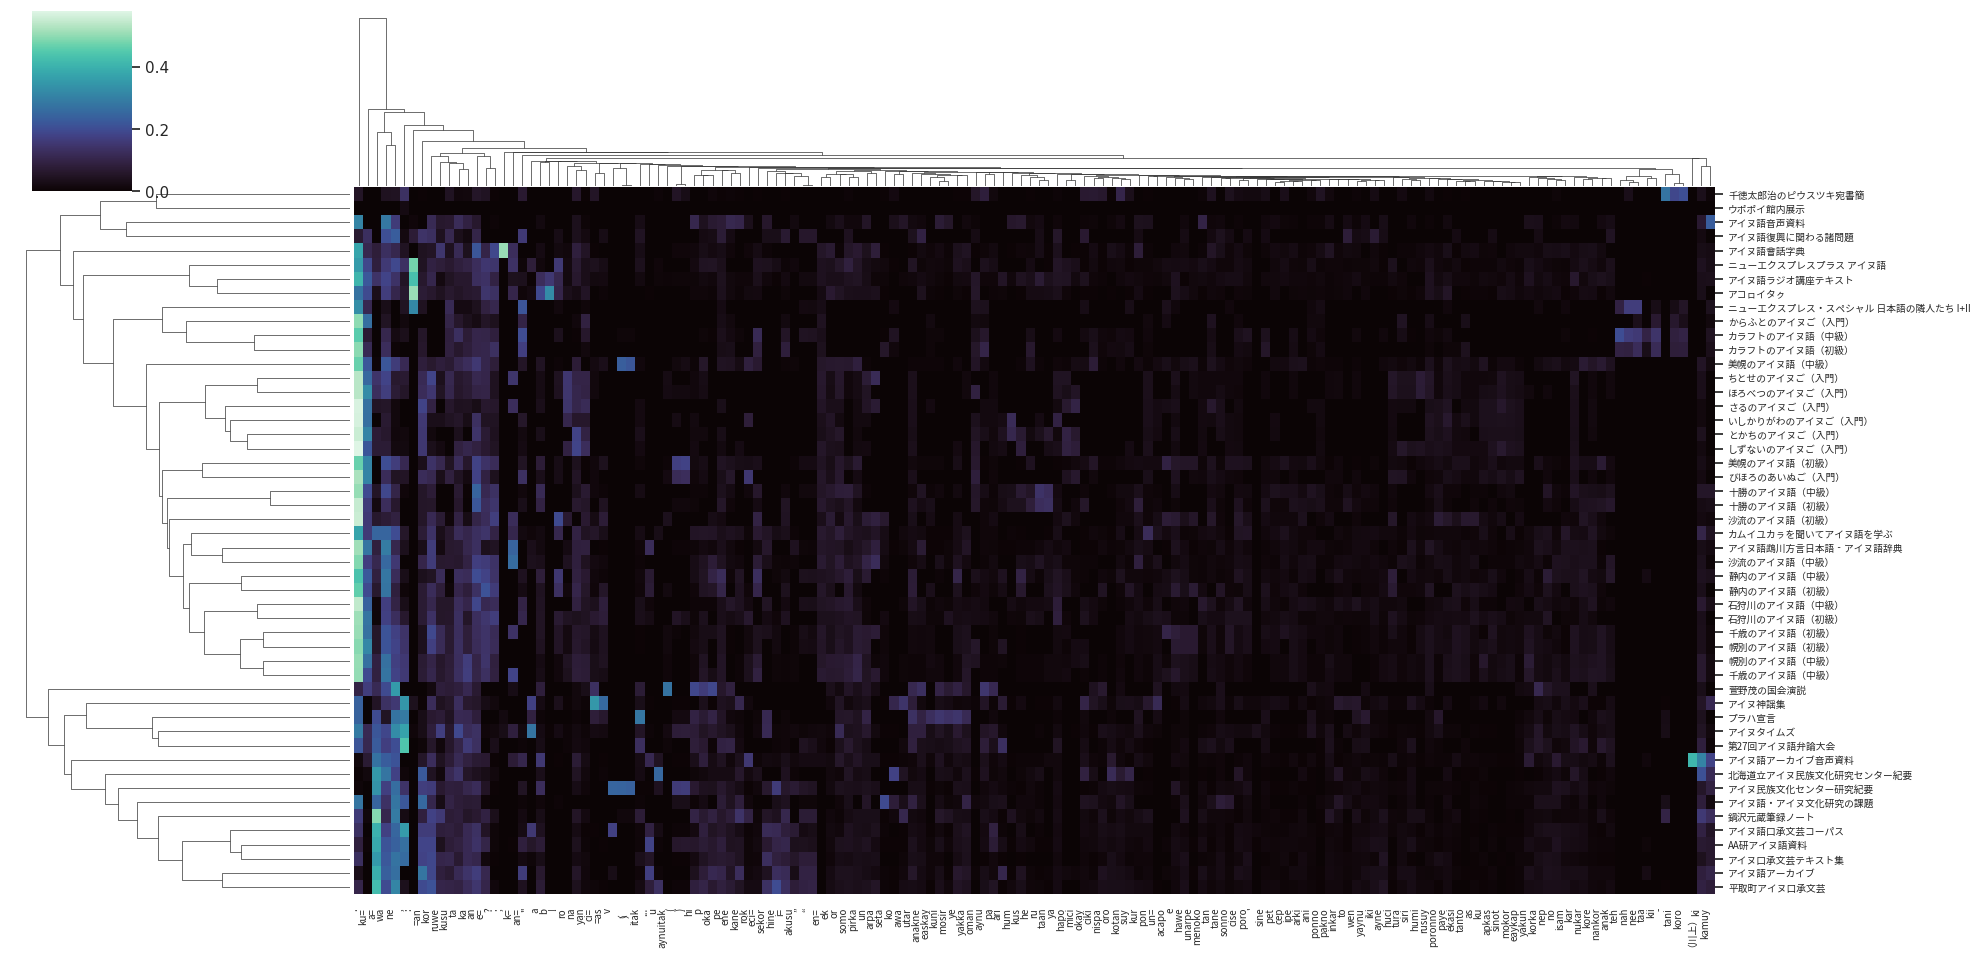

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

font_path = "../fonts/NotoSansCJK-Regular.ttc"
fontManager.addfont(font_path)
font_prop = FontProperties(fname=font_path)

plt.rcParams["font.family"] = ["Noto Sans CJK JP"]


def visualize_tfidf_heatmap(tf_idf_scores, top_n_words=150, top_n_docs=50):
    plt.rcParams["font.family"] = ["Noto Sans CJK JP"]
    fontManager.addfont(font_path)
    font_prop = FontProperties(fname=font_path, size=7)

    # Convert scores to DataFrame
    tfidf_df = pd.DataFrame.from_dict(tf_idf_scores, orient="index").fillna(0)

    # (Optional) focus on top words and docs
    if top_n_words and top_n_words < len(tfidf_df.columns):
        word_sums = tfidf_df.sum().sort_values(ascending=False)
        top_words = word_sums.head(top_n_words).index
    else:
        top_words = tfidf_df.columns

    if top_n_docs and top_n_docs < len(tfidf_df.index):
        doc_sums = tfidf_df.sum(axis=1).sort_values(ascending=False)
        top_docs = doc_sums.head(top_n_docs).index
    else:
        top_docs = tfidf_df.index

    # Subset the DataFrame
    tfidf_subset = tfidf_df.loc[top_docs, top_words]

    # Apply log transform for better contrast
    tfidf_log = np.log1p(tfidf_subset)

    # Set a pleasing style
    sns.set_theme(style="white")

    # Create a cluster map with all ticks shown
    g = sns.clustermap(
        tfidf_log,
        cmap="mako",
        linewidths=0,
        figsize=(20, 10),
        metric="euclidean",
        method="average",
        xticklabels=1,  # Show all column labels
        yticklabels=1,  # Show all row labels,
        cbar_kws={"shrink": 1, "pad": 0.5, "orientation": "vertical"},  # Shrink the color bar
    )

    # Rotate and adjust tick labels
    plt.setp(
        g.ax_heatmap.get_xticklabels(),
        rotation=90,
        ha="right",
        fontsize=8,
        fontproperties=font_prop,
    )
    plt.setp(
        g.ax_heatmap.get_yticklabels(), rotation=0, fontsize=8, fontproperties=font_prop
    )

    # Adjust title and layout
    # g.ax_heatmap.set_title(
    #     "TF-IDF Heatmap (Clustered & Log-Transformed)",
    #     fontsize=12,
    #     fontproperties=font_prop,
    #     pad=20,
    # )

    # Show the plot
    plt.savefig("output/tf-idf-clustering-heatmap.png", dpi=350)
    plt.show()


# Example usage:
visualize_tfidf_heatmap(tf_idf_scores)

/home/mkpoli/projects/Ainu/ainu-corpora-process/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27973 (\N{CJK UNIFIED IDEOGRAPH-6D45}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/mkpoli/projects/Ainu/ainu-corpora-process/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20117 (\N{CJK UNIFIED IDEOGRAPH-4E95}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/mkpoli/projects/Ainu/ainu-corpora-process/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/mkpoli/projects/Ainu/ainu-corpora-process/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12465 (\N{KATAKANA LETTER KE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/mkpoli/project

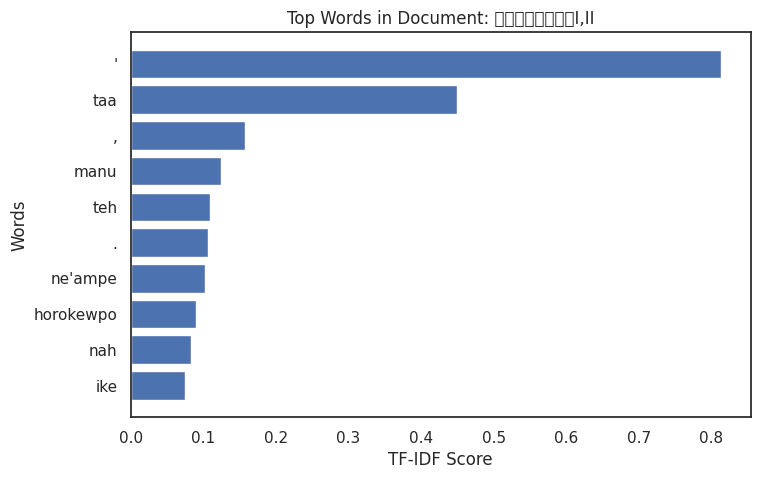

In [20]:
def visualize_tfidf_barchart(tf_idf_scores, doc_id):
    # Get the top words by TF-IDF score
    top_words = sorted(tf_idf_scores[doc_id].items(), key=lambda x: x[1], reverse=True)[
        :10
    ]
    words, scores = zip(*top_words)

    # Plot bar chart
    plt.figure(figsize=(8, 5))
    plt.barh(words, scores)
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.title(f"Top Words in Document: {doc_id}")
    plt.xlabel("TF-IDF Score")
    plt.ylabel("Words")
    plt.show()


# Example usage
# visualize_tfidf_barchart(tf_idf_scores, doc_id="萱野茂の国会演説")
# visualize_tfidf_barchart(tf_idf_scores, doc_id="アイヌ語ラジオ講座テキスト")
# visualize_tfidf_barchart(tf_idf_scores, doc_id="アイヌタイムズ")
visualize_tfidf_barchart(tf_idf_scores, doc_id="浅井タケ昔話全集I,II")

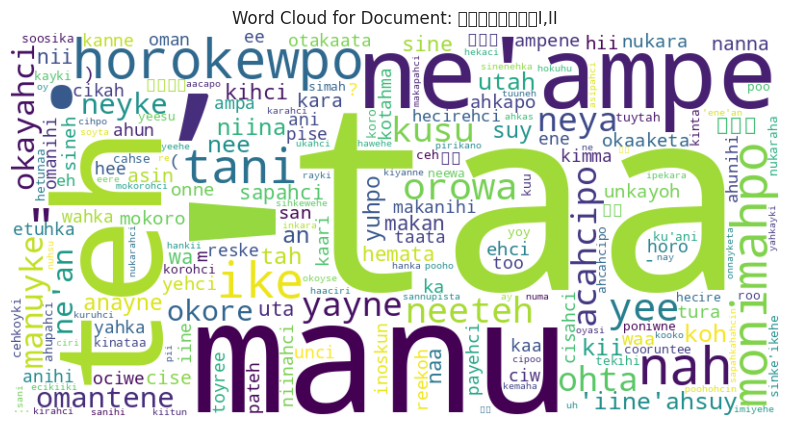

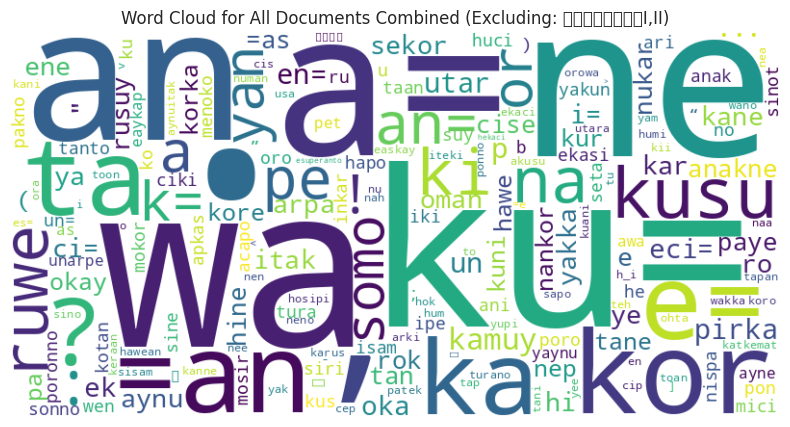

In [21]:
from wordcloud import WordCloud


def visualize_tfidf_wordcloud(tf_idf_scores, doc_id):
    # Generate word cloud data
    wordcloud = WordCloud(
        width=800, height=400, background_color="white"
    ).generate_from_frequencies(tf_idf_scores[doc_id])

    # Display word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Document: {doc_id}")
    plt.show()


# Example usage
visualize_tfidf_wordcloud(tf_idf_scores, doc_id="浅井タケ昔話全集I,II")

def visualize_tfidf_wordcloud_all_docs_combined_except(tf_idf_scores, except_doc_id: str): 
    combined_scores = {}
    for doc_id, scores in tf_idf_scores.items():
        if doc_id == except_doc_id:
            continue
        for word, score in scores.items():
            combined_scores[word] = combined_scores.get(word, 0) + score

    # Generate the word cloud
    wordcloud = WordCloud(
        width=800, height=400, background_color="white"
    ).generate_from_frequencies(combined_scores)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for All Documents Combined (Excluding: {except_doc_id})")
    plt.show()

# Example usage
visualize_tfidf_wordcloud_all_docs_combined_except(
    tf_idf_scores, except_doc_id="浅井タケ昔話全集I,II"
)


# visualize_tfidf_wordcloud(tf_idf_scores, doc_id="浅井タケ昔話全集I,II")

/tmp/ipykernel_2052873/2405842028.py:26: UserWarning: Glyph 12450 (\N{KATAKANA LETTER A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2052873/2405842028.py:26: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2052873/2405842028.py:26: UserWarning: Glyph 12492 (\N{KATAKANA LETTER NU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2052873/2405842028.py:26: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2052873/2405842028.py:26: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2052873/2405842028.py:26: UserWarning: Glyph 12459 (\N{KATAKANA LETTER KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2052873/2405842028.py:26: UserWarning: Glyph 12502 (\N{KATAKANA LETTER BU}) missing

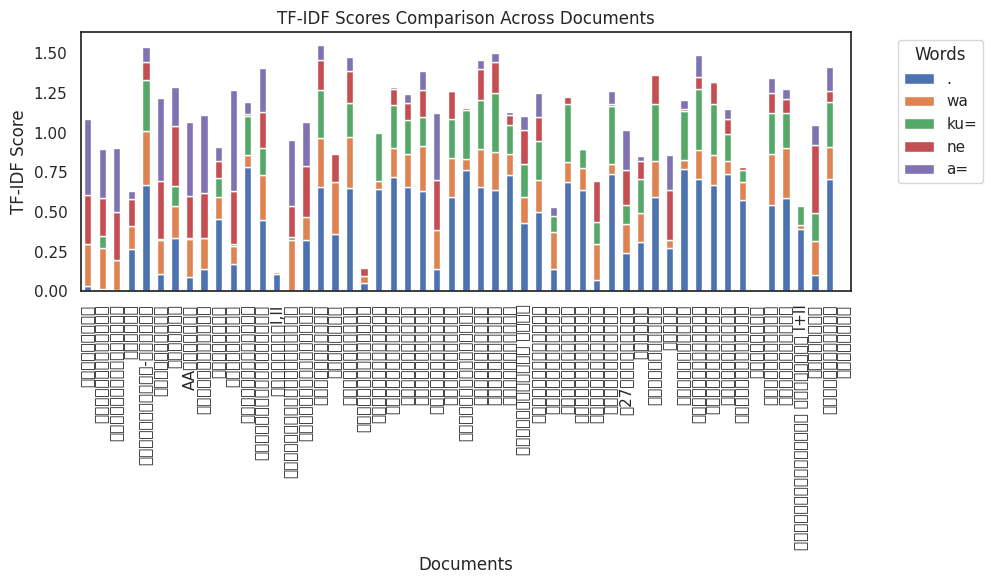

In [22]:
def visualize_tfidf_comparison(tf_idf_scores, top_n=5):
    # Aggregate top words across all documents
    all_words = {word for scores in tf_idf_scores.values() for word in scores}
    word_totals = {
        word: sum(scores.get(word, 0) for scores in tf_idf_scores.values())
        for word in all_words
    }
    top_words = sorted(word_totals.items(), key=lambda x: x[1], reverse=True)[:top_n]

    # Prepare data
    words, _ = zip(*top_words)
    comparison_df = pd.DataFrame(
        {
            doc_id: [tf_idf_scores[doc_id].get(word, 0) for word in words]
            for doc_id in tf_idf_scores.keys()
        },
        index=words,
    )

    # Plot stacked bar chart
    comparison_df.T.plot(kind="bar", stacked=True, figsize=(10, 6))
    plt.title("TF-IDF Scores Comparison Across Documents")
    plt.xlabel("Documents")
    plt.ylabel("TF-IDF Score")
    plt.legend(title="Words", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()


# Example usage
visualize_tfidf_comparison(tf_idf_scores)

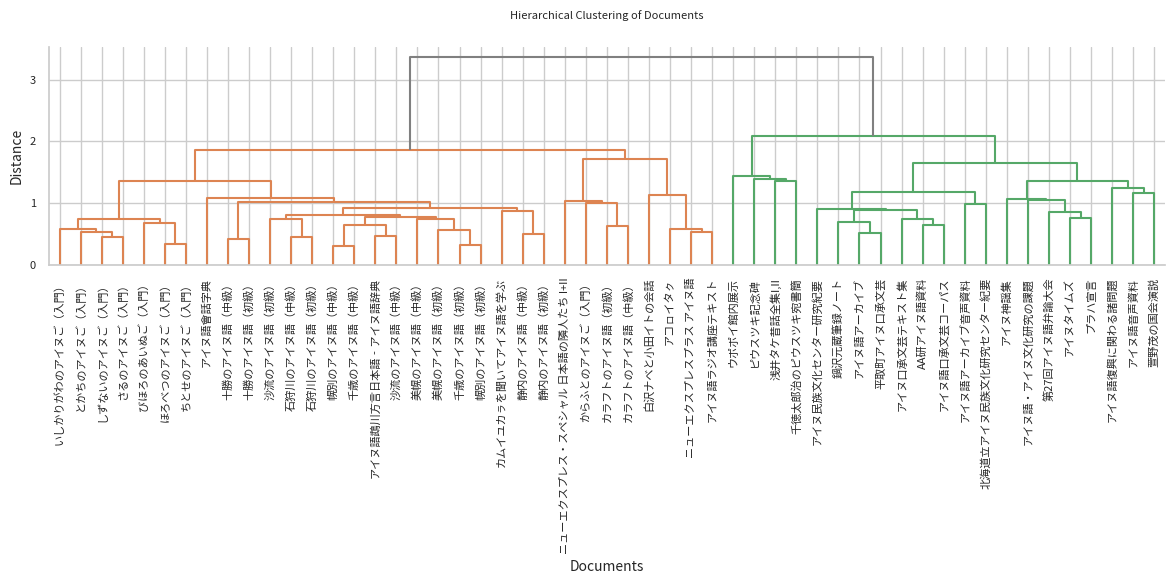

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns

def visualize_document_clustering(
    tf_idf_scores, font_path, method="ward", metric="euclidean", figsize=(12, 6)
):
    # Load the custom font
    plt.rcParams["font.family"] = ["Noto Sans CJK JP"]
    fontManager.addfont(font_path)
    font_prop = FontProperties(fname=font_path, size=8)

    # Convert TF-IDF scores into a DataFrame
    # Rows: documents, Columns: words
    tfidf_df = pd.DataFrame.from_dict(tf_idf_scores, orient="index").fillna(0)

    # Perform hierarchical clustering
    # `method` can be 'ward', 'complete', 'average', etc.
    # `metric` can be 'euclidean', 'cosine', etc.
    linkage_matrix = linkage(tfidf_df, method=method, metric=metric)

    # Set a visual theme
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=figsize)

    # Plot the dendrogram
    # `labels=tfidf_df.index` ensures document IDs appear on the dendrogram
    dendro = dendrogram(
        linkage_matrix,
        labels=tfidf_df.index.tolist(),
        leaf_rotation=90,  # Rotate labels 90 degrees for readability
        leaf_font_size=8,  # Smaller font size for documents
        above_threshold_color="gray",
        orientation="top",  # Put leaves at the bottom, dendrogram on top
    )

    # Title and axis formatting
    plt.title(
        "Hierarchical Clustering of Documents",
        fontsize=14,
        fontproperties=font_prop,
        pad=20,
    )
    plt.xlabel("Documents", fontsize=10, fontproperties=font_prop)
    plt.ylabel("Distance", fontsize=10, fontproperties=font_prop)

    # Apply font properties to tick labels
    plt.xticks(fontproperties=font_prop)
    plt.yticks(fontproperties=font_prop)

    # Remove top and right spines for a cleaner look
    sns.despine()

    # Tight layout for better spacing
    plt.tight_layout()

    plt.savefig("output/tf_idf_clustering_dendrogram.png", dpi=350)
    plt.show()

visualize_document_clustering(tf_idf_scores, "../fonts/NotoSansCJK-Regular.ttc")

/tmp/ipykernel_2052873/1199796161.py:87: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


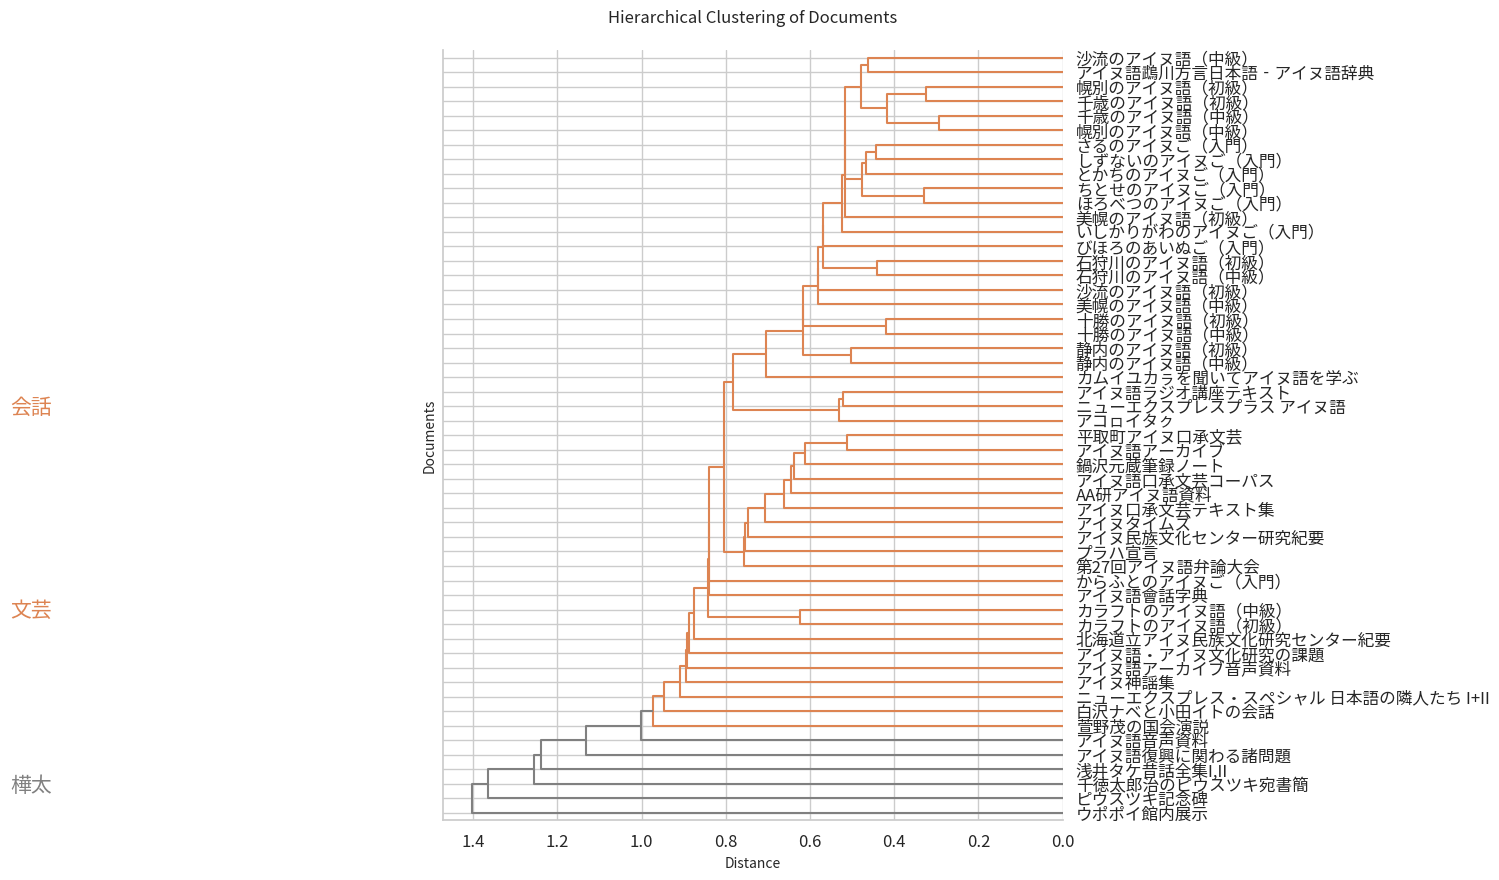

/tmp/ipykernel_2052873/1199796161.py:87: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


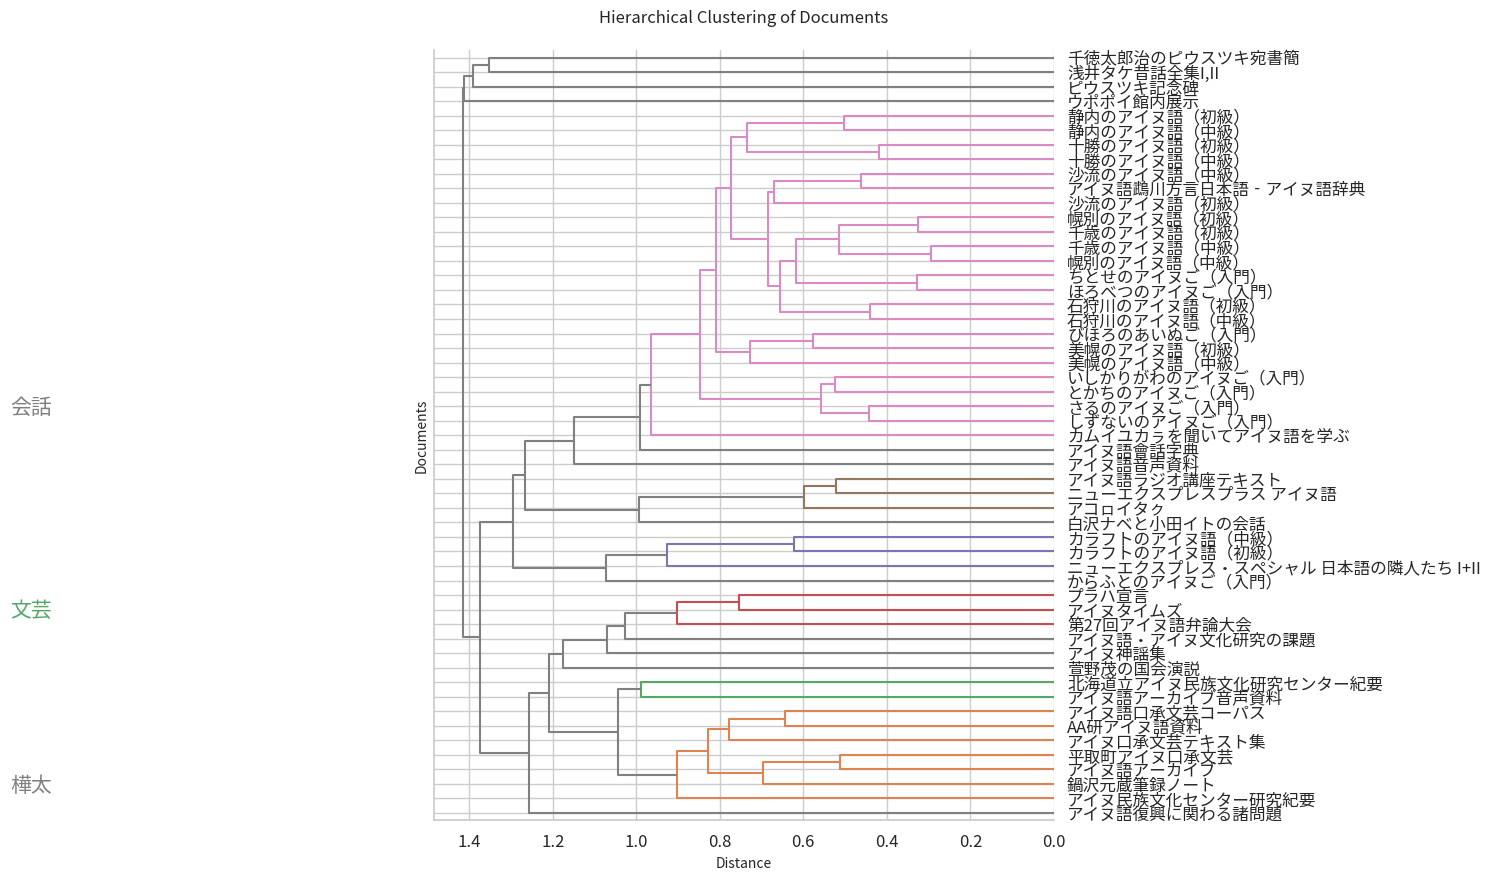

/tmp/ipykernel_2052873/1199796161.py:87: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


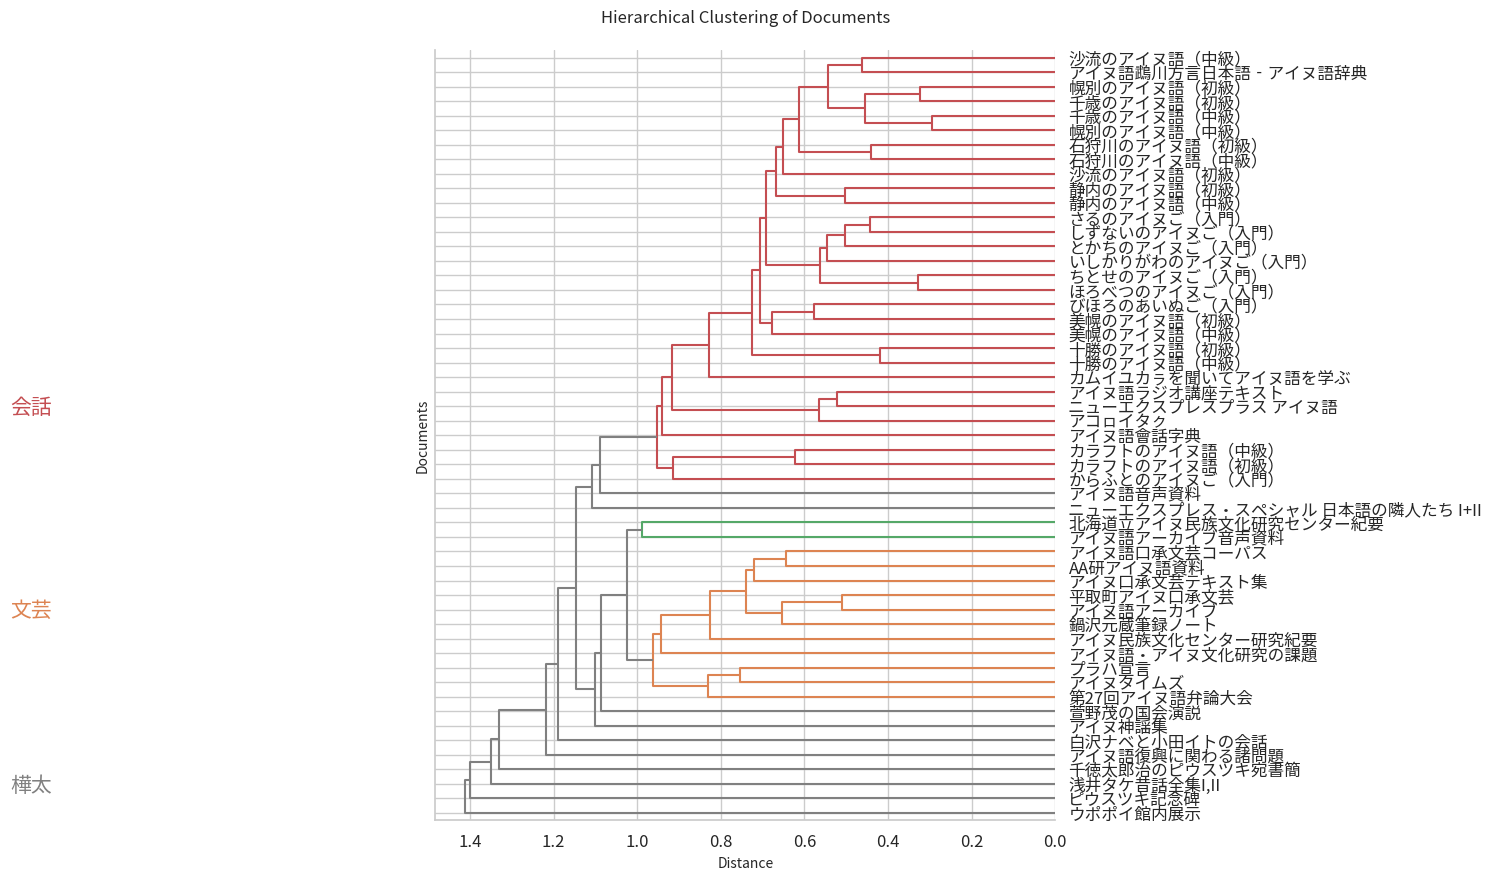

/tmp/ipykernel_2052873/1199796161.py:87: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


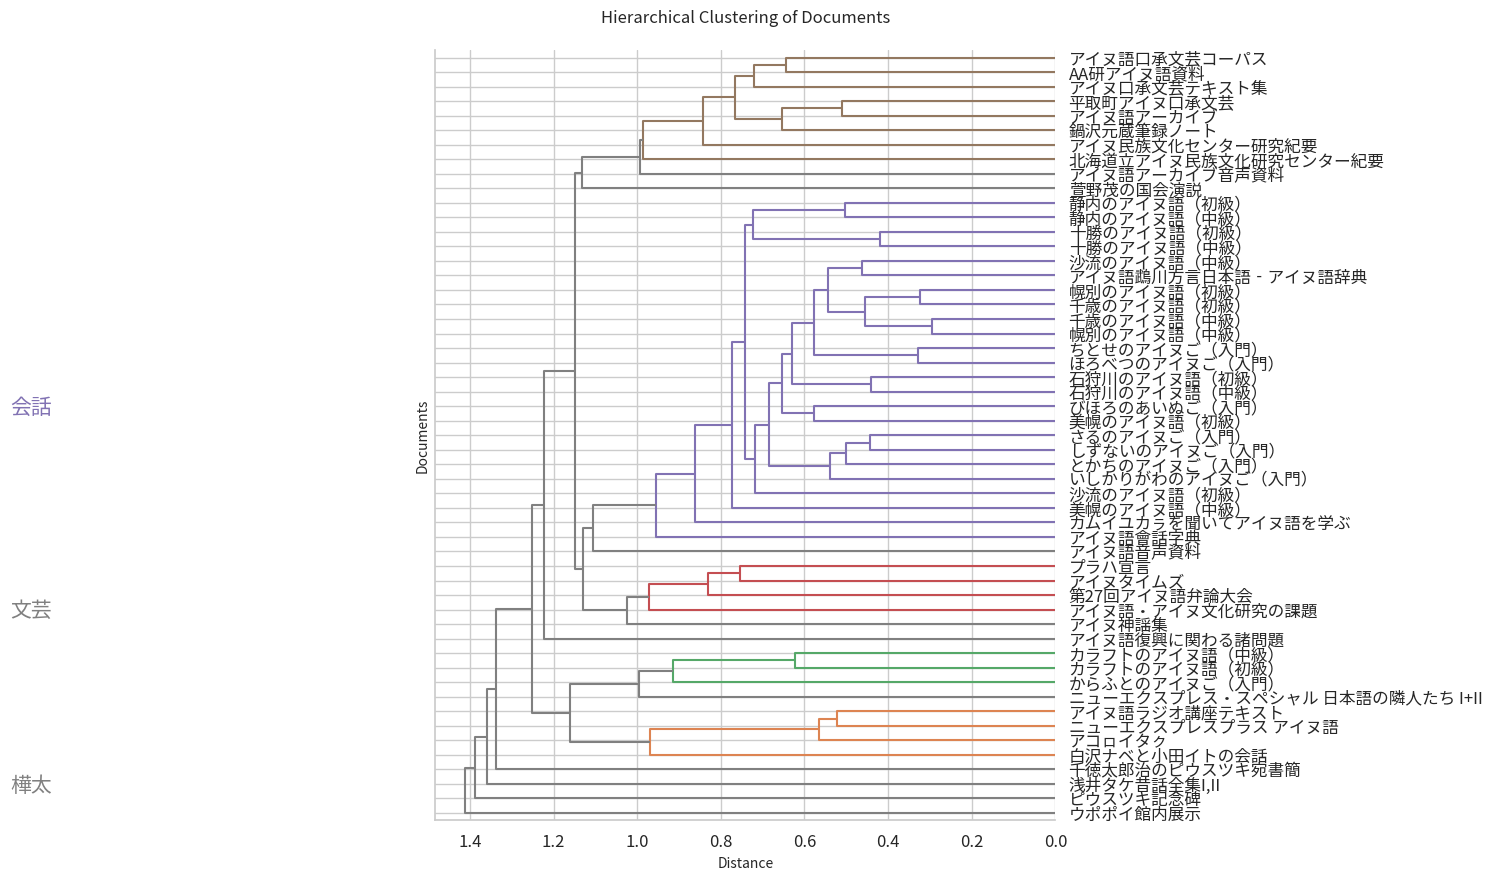

/tmp/ipykernel_2052873/1199796161.py:87: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


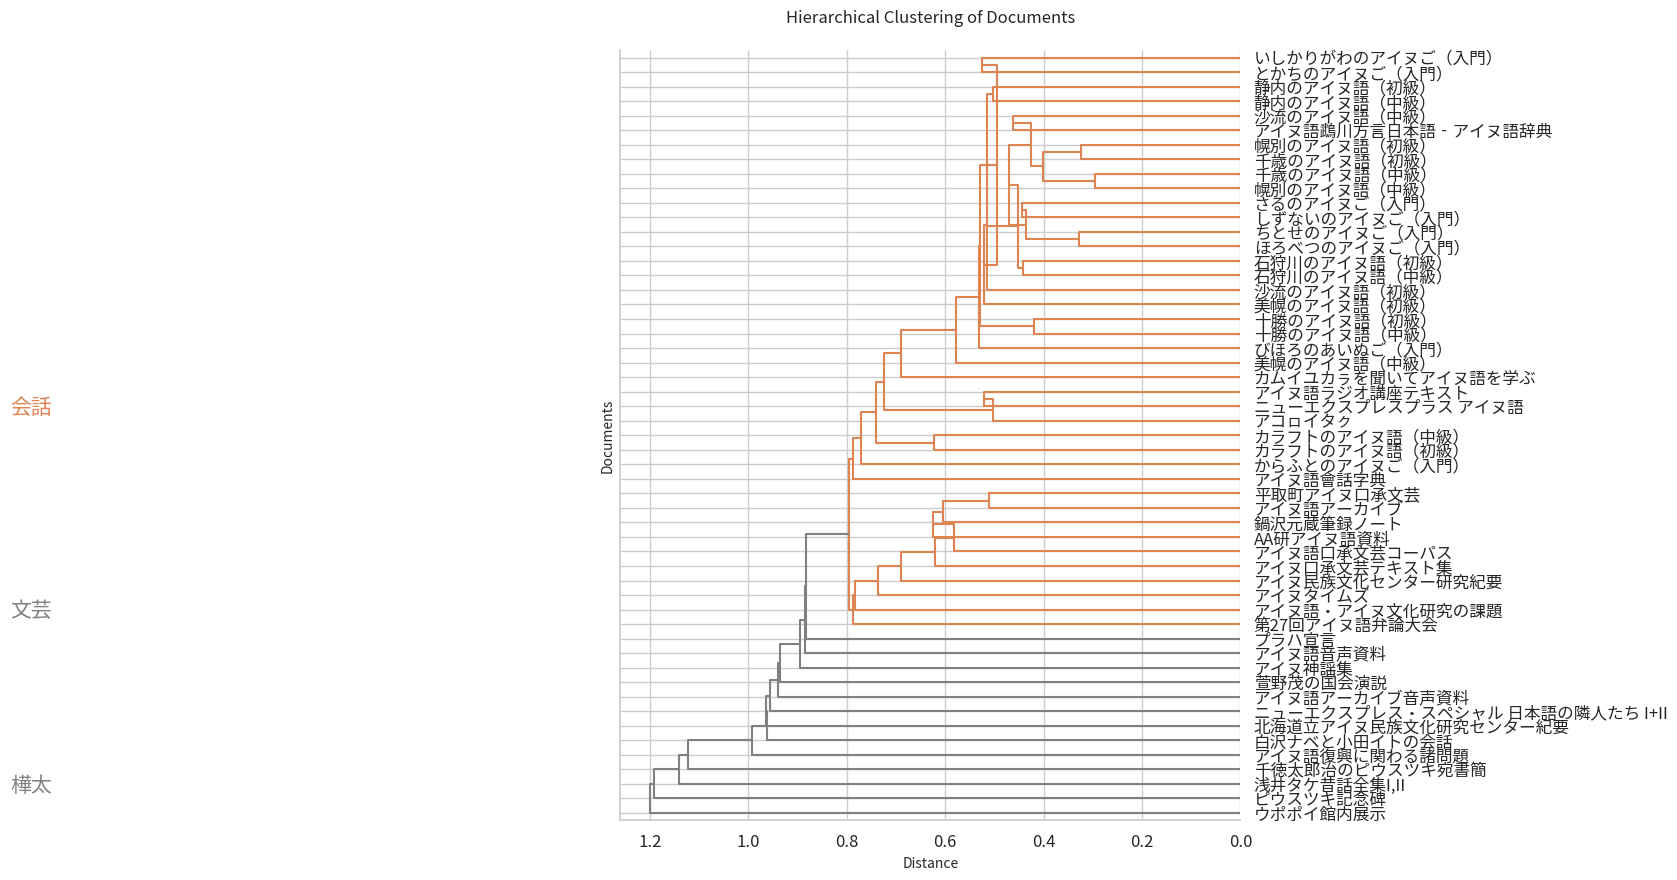

/tmp/ipykernel_2052873/1199796161.py:87: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


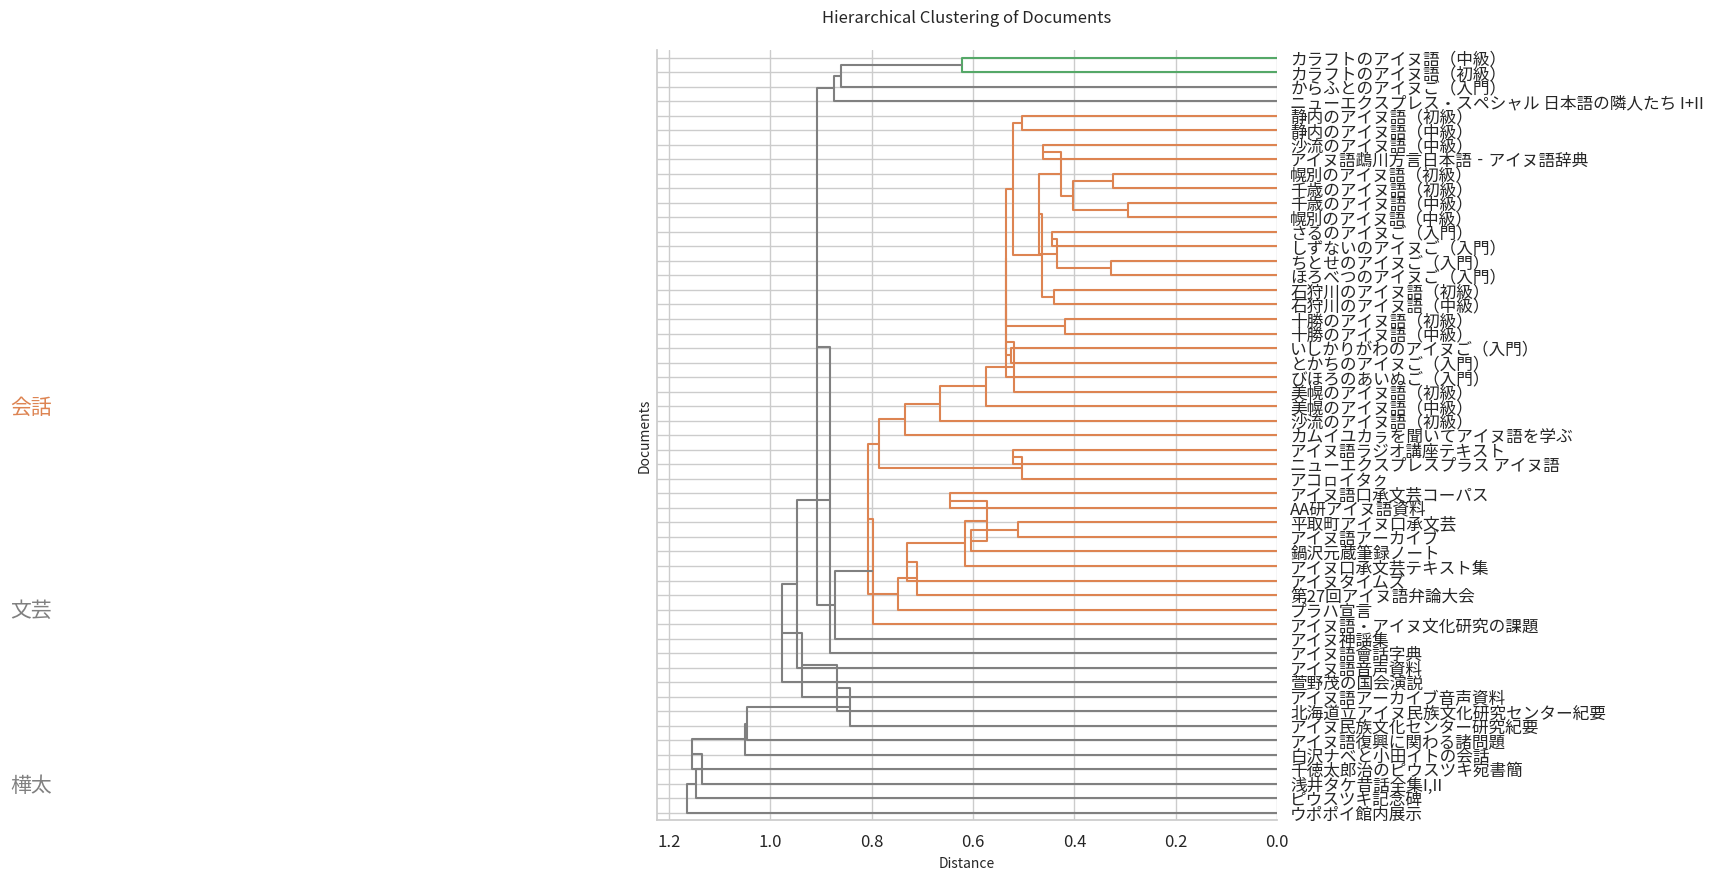

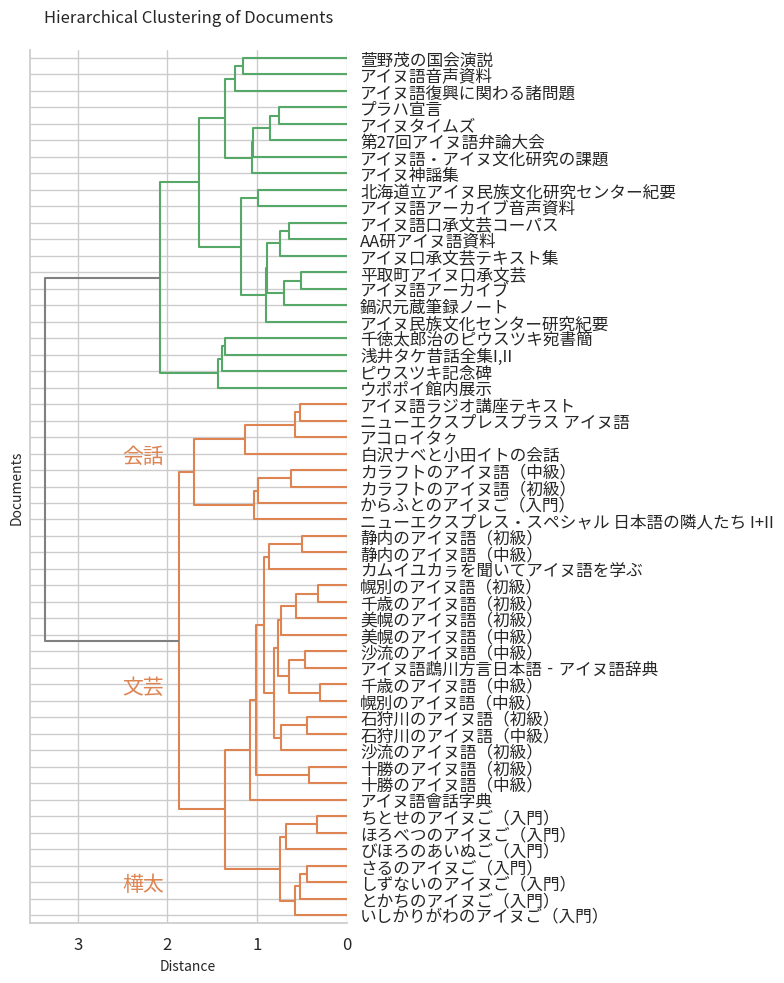

In [24]:
def visualize_document_clustering_horizontal(
    tf_idf_scores, font_path, method="ward", metric="euclidean"
):
    # Load the custom font
    plt.rcParams["font.family"] = ["Noto Sans CJK JP"]
    fontManager.addfont(font_path)
    font_prop = FontProperties(fname=font_path)

    # Convert TF-IDF scores into a DataFrame
    # Rows: documents, Columns: words
    tfidf_df = pd.DataFrame.from_dict(tf_idf_scores, orient="index").fillna(0)

    # Perform hierarchical clustering
    linkage_matrix = linkage(tfidf_df, method=method, metric=metric)

    # Set a visual theme
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(8, 10))

    # Plot the dendrogram (horizontal orientation)
    dendro = dendrogram(
        linkage_matrix,
        labels=tfidf_df.index.tolist(),
        leaf_rotation=0,  # Horizontal leaves don't need rotation
        leaf_font_size=8,  # Smaller font size for document labels
        above_threshold_color="gray",
        orientation="left",  # Horizontal orientation
    )

    # cluster_labels = {0: "Cluster A", 1: "Cluster B", 2: "Cluster C"}
    # cluster_coords = {
    #     label: (icoord[idx].mean(), dcoord[idx].max())
    #     for idx, label in enumerate(cluster_labels)
    # }

    # for cluster, (x, y) in cluster_coords.items():
    #     plt.text(
    #         x, y, cluster,
    #         fontsize=10, fontproperties=font_prop,
    #         color='red', ha='center', va='bottom',
    #         bbox=dict(boxstyle="round,pad=0.3", edgecolor="red", facecolor="white", alpha=0.8)
    #     )

    colors = dendro["leaves_color_list"]

    plt.text(
        2.5,
        20,
        "樺太",
        fontproperties=FontProperties(fname=font_path, size=15),
        color=colors[0],
    )

    plt.text(
        2.5,
        140,
        "文芸",
        fontproperties=FontProperties(fname=font_path, size=15),
        color=colors[8],
    )
    plt.text(
        2.5,
        280,
        "会話",
        fontproperties=FontProperties(fname=font_path, size=15),
        color=colors[25],
    )

    # Title and axis formatting
    plt.title(
        "Hierarchical Clustering of Documents",
        fontsize=12,
        fontproperties=font_prop,
        pad=20,
    )
    plt.xlabel("Distance", fontsize=10, fontproperties=font_prop)
    plt.ylabel("Documents", fontsize=10, fontproperties=font_prop)

    # Apply font properties to tick labels
    plt.xticks(fontproperties=font_prop)
    plt.yticks(fontproperties=font_prop)

    # Remove top and right spines for a cleaner look
    sns.despine()

    # Tight layout for better spacing
    plt.tight_layout()
    plt.savefig(f"output/tf_idf_clustering_dendrogram_h_{method}.png", dpi=350)
    plt.show()


# Example usage:

for method in [
    "single",
    "complete",
    "average",
    "weighted",
    "centroid",
    "median",
    "ward",
]:
    visualize_document_clustering_horizontal(
        tf_idf_scores, "../fonts/NotoSansCJK-Regular.ttc",
        method=method
    )
